![](https://th.bing.com/th/id/OIP.Q3uzPlSo9XCK3W-q5m4tGAHaFQ?w=258&h=183&c=7&r=0&o=5&dpr=1.7&pid=1.7)

![](https://th.bing.com/th/id/OIP.JblgQQsR1liNocfKtXV67QHaFj?w=245&h=183&c=7&r=0&o=5&dpr=1.7&pid=1.7)

# <a id="Import"></a>
# <p style="background-color: #422057FF; font-family: 'Copperplate'; color:#FDDB27FF; font-size:140%; text-align:center; border-radius:1000px 10px;">1.0 About Author</p> 

<div style="border: 2px solid #006B38FF; padding: 10px; max-width: 1500px;">
    <p>
        I am <b>Atif Ali Khokhar</b>, a passionate data scientist dedicated to mastering machine learning techniques and continually expanding my knowledge base. I believe in the mantra of #KeepLearning and #KeepSupporting, as I am committed to constant growth and uplifting others in the field.
    </p>
    <div style="text-align: center;">
        <img src="https://media.licdn.com/dms/image/D4E03AQHbj9PaMNpUuQ/profile-displayphoto-shrink_400_400/0/1694879278829?e=1721260800&v=beta&t=XWss7C6pbhbBWJoETbMhxsQASHKpP9Vkf7qty24U6Hs" alt="Profile Picture" style="width: 100px; height: 100px; border-radius: 50%; border: 2px solid #D35400;"><br>
    </div>
    <p>
        You can find more about me on my <a href="https://www.linkedin.com/in/atifalikhokhar/" target="_blank">LinkedIn</a>.<br>
        Feel free to connect and reach out for any collaboration or queries!
    </p>
</div>

# <a id="Import"></a>
# <p style="background-color: #422057FF; font-family: 'Copperplate'; color:#FDDB27FF; font-size:140%; text-align:center; border-radius:1000px 10px;">2.0 About Project and Data</p> 

## Project Title: Orange Disease Classification with Convolutional Neural Networks(CNN)

### **Overview:**
    This Kaggle notebook focuses on classifying orange diseases using deep learning techniques. We aim to distinguish between four primary disease categories: Black Spot, Canker, Fresh, and Greening. By leveraging a Convolutional Neural Network (CNN), we’ll create a robust model capable of accurate disease detection.
    
### **Dataset:**
    The dataset comprises images of orange leaves, each labeled with one of the four disease classes. These images have been preprocessed and resized for model training. The dataset is well-balanced, ensuring representation from all disease categories.
[LINK](/kaggle/input/orange-diseases-dataset)

### **Approach:**
**Data Preprocessing:**
Load and preprocess the orange leaf images.
Normalize pixel values and augment the dataset to improve model generalization.

**Model Architecture:**
Build a CNN architecture suitable for image classification.
Utilize convolutional layers, pooling layers, and fully connected layers.
Experiment with different architectures.

**Training and Validation:**
Split the dataset into training and validation sets.
Train the CNN model using labeled images.
Monitor training progress using loss and accuracy metrics.

**Evaluation:**
Evaluate the trained model on a separate test set.

**Predictions:**
Use the trained model to predict disease classes for unseen orange leaf images.
Interpret model predictions and identify areas for improvement.

# <a id="Import"></a>
# <p style="background-color: #422057FF; font-family: 'Copperplate'; color:#FDDB27FF; font-size:140%; text-align:center; border-radius:1000px 10px;">3.0 Data Processing</p> 


### **3.1 Importing Libraries** 

In [1]:
# For data manipulation
import numpy as np 
import pandas as pd 

# For data visualization
import matplotlib.pyplot as plt 
import seaborn as sns

# Ingore the warnings
import warnings
warnings.filterwarnings('ignore')

# DL Libraries
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.utils import image_dataset_from_directory

# Other libraries
import os
import random


2024-06-22 05:27:35.728922: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-22 05:27:35.729052: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-22 05:27:35.881085: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


### **3.1 Loading Image Dataset from Directory**

In [2]:
# Load the image dataset from the directory using utils
# ds = image_dataset_from_directory('E:\DataScience Codanics\Kaggle\LAPTOP Items classification\PC Part Classification\Data')

train_ds = keras.utils.image_dataset_from_directory(
    directory = r'/kaggle/input/orange-diseases-dataset/dataset/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),
)

val_ds = keras.utils.image_dataset_from_directory(
    directory = r'/kaggle/input/orange-diseases-dataset/dataset/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),
)


Found 1164 files belonging to 4 classes.
Found 1164 files belonging to 4 classes.


### **3.2 Visualize the images**

In [21]:
# Creating a function to visualize the images

def visualize_images(path, num_images=5):

    # Get a list of image filenames
    image_filenames = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

    if not image_filenames:
        raise ValueError("No images found in the specified path")

    # Select random images
    selected_images = random.sample(image_filenames, min(num_images, len(image_filenames)))

    # Create a figure and axes
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3), facecolor='white')

    # Display each image
    for i, image_filename in enumerate(selected_images):
        # Load image
        image_path = os.path.join(path, image_filename)
        image = plt.imread(image_path)

        # Display image
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(image_filename)  # Set image filename as title

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

In [22]:
# Extrating the class labels
classes = train_ds.class_names

BLACKSPOT


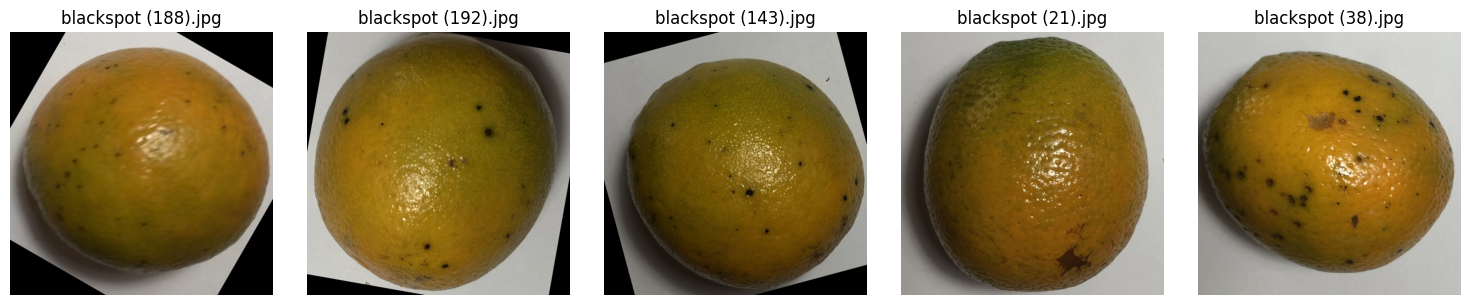

CANKER


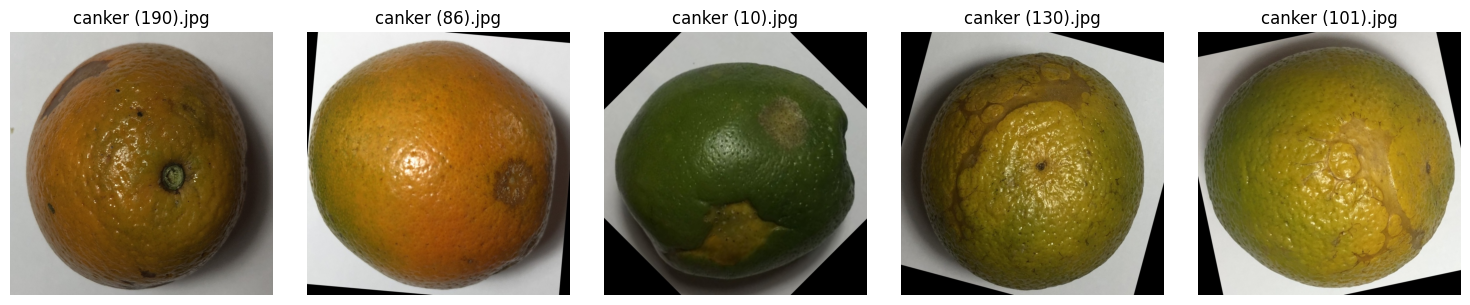

FRESH


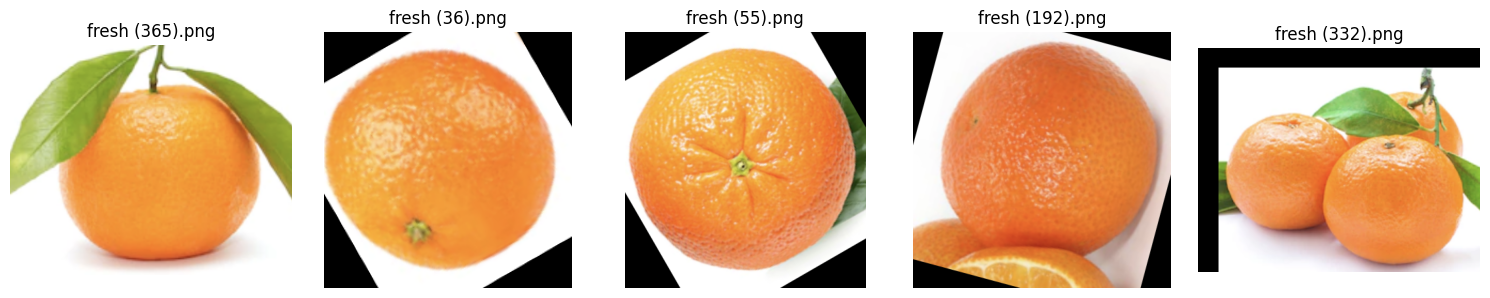

GRENNING


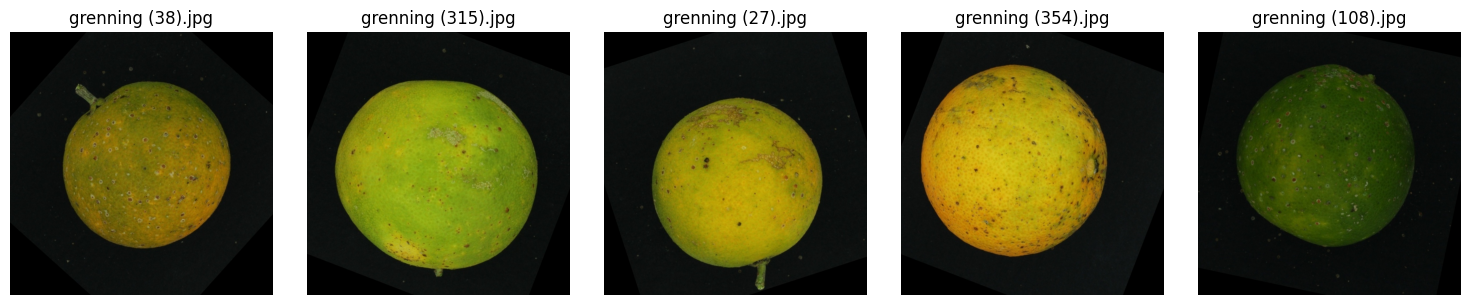

In [23]:
# Iterating through each class to plot its images
for label in classes:
    
    # Specify the path containing the images to visualize
    path_to_visualize = f"/kaggle/input/orange-diseases-dataset/dataset/train/{label}"

    # Visualize 5 random images
    print(label.upper())
    visualize_images(path_to_visualize, num_images=5)

# <a id="Import"></a>
# <p style="background-color: #422057FF; font-family: 'Copperplate'; color:#FDDB27FF; font-size:140%; text-align:center; border-radius:1000px 10px;">4.0 Modeling</p> 

### **4.1 Model Building**

In [24]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(64, kernel_size=(3, 3),activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

model.add(Dense(4, activation='softmax'))

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 246016)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    31,490,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,520,036 (120.24 MB)

 Trainable params: 31,520,036 (120.24 MB)

 Non-trainable params: 0 (0.00 B)

### **4.2 Model Compilation**

In [27]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### **4.3 Model Training**

In [28]:
# Train the model

history = model.fit(train_ds, batch_size=32, epochs=10, validation_data=val_ds, verbose=1)

Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 97s 3s/step - accuracy: 0.4362 - loss: 353.2093 - val_accuracy: 0.8943 - val_loss: 0.3604
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 94s 3s/step - accuracy: 0.8719 - loss: 0.6316 - val_accuracy: 0.9235 - val_loss: 0.2018
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 94s 3s/step - accuracy: 0.9325 - loss: 0.1976 - val_accuracy: 0.9631 - val_loss: 0.1022
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 94s 3s/step - accuracy: 0.9410 - loss: 0.1709 - val_accuracy: 0.9158 - val_loss: 0.2026
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 95s 3s/step - accuracy: 0.9411 - loss: 0.1525 - val_accuracy: 0.9785 - val_loss: 0.0515
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 140s 3s/step - accuracy: 0.9800 - loss: 0.0510 - val_accuracy: 0.9665 - val_loss: 0.0835
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 142s 3s/step - accuracy: 0.9506 - loss: 0.1112 - val_accuracy: 0.9854 - val_loss: 0.0383
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 94s 3s/step - accuracy: 0.9892 - loss: 0.0351 - val_accuracy: 0.9914 - val_l

### **4.4 Plotting the Graphs of Accuracy and Loss**

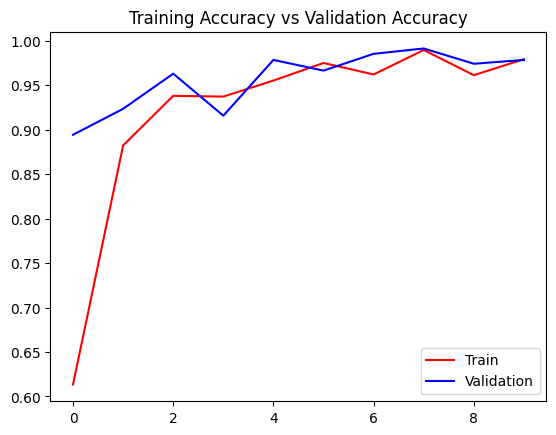

In [30]:
# Plotting the graph of Accuracy and Validation Accuracy
plt.title('Training Accuracy vs Validation Accuracy')

plt.plot(history.history['accuracy'], color='red',label='Train')
plt.plot(history.history['val_accuracy'], color='blue',label='Validation')

plt.legend()

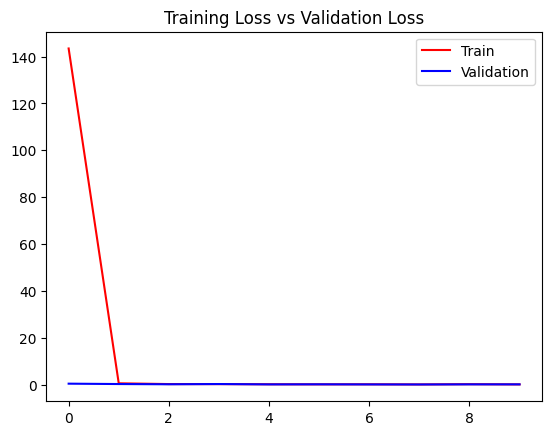

In [31]:
# Plotting the graph of Accuracy and Validation loss
plt.title('Training Loss vs Validation Loss')

plt.plot(history.history['loss'], color='red',label='Train')
plt.plot(history.history['val_loss'], color='blue',label='Validation')

plt.legend()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 624ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 617ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

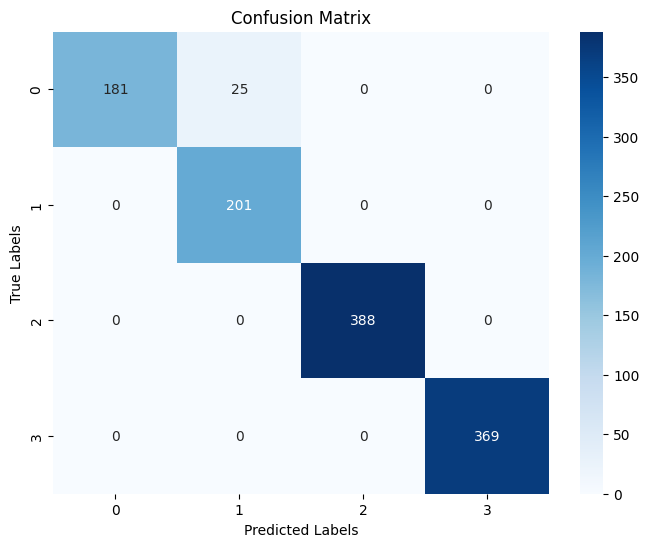

In [32]:
import numpy as np
from sklearn.metrics import cohen_kappa_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Prediksi pada dataset validasi
y_pred = []
y_true = []

for images, labels in val_ds:
    predictions = model.predict(images)
    y_pred.extend(np.argmax(predictions, axis=1))
    y_true.extend(labels.numpy())

# Menghitung Kappa Score
kappa = cohen_kappa_score(y_true, y_pred)
print(f"Cohen's Kappa Score: {kappa}")

# Membuat confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 685ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 609ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 698ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 716ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 722ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 629ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

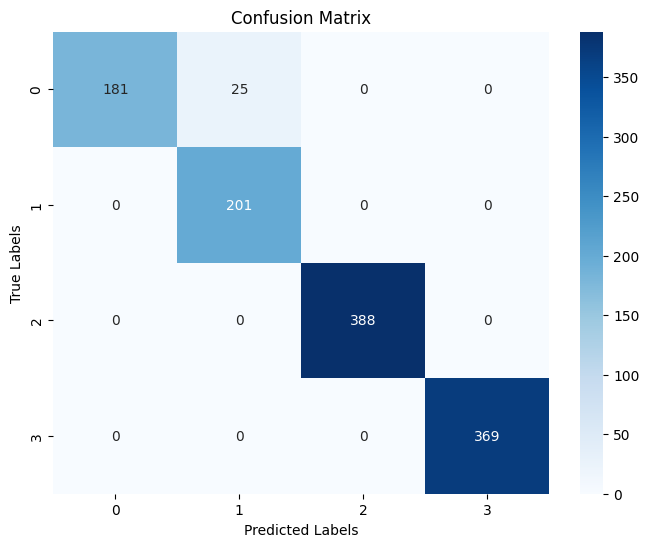

In [33]:
import numpy as np
from sklearn.metrics import cohen_kappa_score, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Prediksi pada dataset validasi
y_pred = []
y_true = []

for images, labels in val_ds:
    predictions = model.predict(images)
    y_pred.extend(np.argmax(predictions, axis=1))
    y_true.extend(labels.numpy())

# Menghitung Kappa Score
kappa = cohen_kappa_score(y_true, y_pred)
print(f"Cohen's Kappa Score: {kappa}")

# Menghitung Akurasi
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy}")

# Membuat confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
